In [4]:
!pip install scikit-image

   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   --------- ------------------------------ 3.1/12.9 MB 30.7 MB/s eta 0:00:01
   -------------- ------------------------- 4.7/12.9 MB 11.9 MB/s eta 0:00:01
   -------------- ------------------------- 4.7/12.9 MB 11.9 MB/s eta 0:00:01
   -------------------- ------------------- 6.6/12.9 MB 8.4 MB/s eta 0:00:01
   ---------------------- ----------------- 7.3/12.9 MB 7.4 MB/s eta 0:00:01
   ------------------------- -------------- 8.1/12.9 MB 6.9 MB/s eta 0:00:01
   --------------------------- ------------ 8.9/12.9 MB 6.1 MB/s eta 0:00:01
   ------------------------------ --------- 10.0/12.9 MB 6.0 MB/s eta 0:00:01
   --------------------------------- ------ 10.7/12.9 MB 5.8 MB/s eta 0:00:01
   ---------------------------------------  12.6/12.9 MB 6.0 MB/s eta 0:00:01
   ---------------------------------------- 12.9/12.9 MB 5.7 MB/s eta 0:00:00

   ---------------------------------------- 0/3 [tifffile]
   -------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


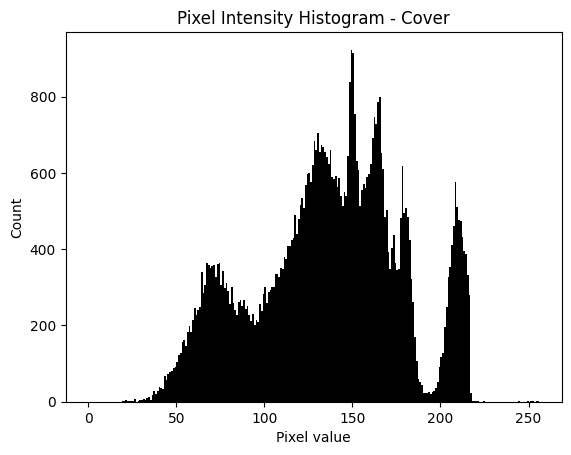

In [2]:
import matplotlib.pyplot as plt
from skimage import io

# Load PGM image
img = io.imread("C:/Users/Sakthi Sairam.U/Downloads/archive/cover/100.pgm")
#stego 075
#cover 593
# Histogram
plt.figure()
plt.hist(img.ravel(), bins=256, range=(0, 256), color='black')
plt.title('Pixel Intensity Histogram - Cover')
plt.xlabel('Pixel value')
plt.ylabel('Count')
plt.show()


<Figure size 640x480 with 0 Axes>

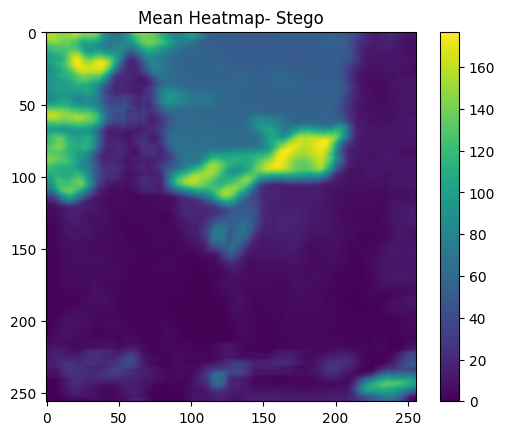

<Figure size 640x480 with 0 Axes>

In [4]:
import numpy as np
img1 = io.imread("C:/Users/Sakthi Sairam.U/Downloads/archive/stego/9118.pgm")
# If examining local mean/variance, use a sliding window, otherwise compute overall:
mean_img = np.mean(img1)
var_img = np.var(img1)

# For local statistics: (e.g., 11x11 window)
from scipy.ndimage import generic_filter

kernel_size = 11
mean_map = generic_filter(img1, np.mean, size=kernel_size)
var_map = generic_filter(img1, np.var, size=kernel_size)
#coer 91 100
plt.figure()
plt.imshow(mean_map, cmap='viridis')
plt.title('Mean Heatmap- Stego')
plt.colorbar()
plt.figure()
# plt.imshow(var_map, cmap='magma')
# plt.title('Variance Heatmap')
# plt.colorbar()
# plt.show()


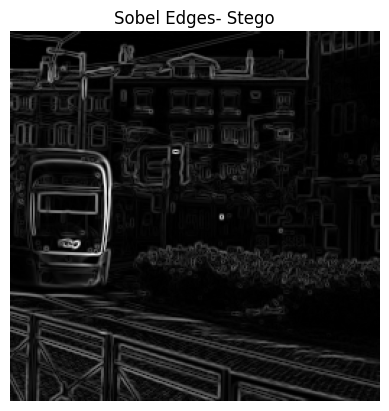

Edge density: 0.143


In [13]:
from skimage import filters
img2 = io.imread("C:/Users/Sakthi Sairam.U/Downloads/archive/stego/5015.pgm")
# Edge detection (e.g., Sobel operator)
edges = filters.sobel(img2)
plt.figure()
plt.imshow(edges, cmap='gray')
plt.title('Sobel Edges- Stego')
plt.axis('off')
plt.show()

# Edge density: proportion of strong edge pixels
threshold = 0.1
edge_density = np.mean(edges > threshold)
print(f'Edge density: {edge_density:.3f}')


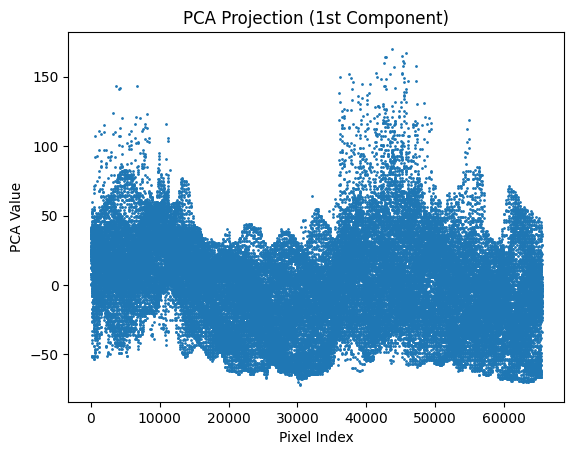

In [29]:
from sklearn.decomposition import PCA

# Flatten the image into a 2D array if analyzing patches, or treat rows/columns as samples.
img_flat = img2.reshape(-1, 1)
pca = PCA(n_components=1)
pca_proj = pca.fit_transform(img_flat)

plt.figure()
plt.scatter(range(len(pca_proj)), pca_proj, s=1)
plt.title('PCA Projection (1st Component)')
plt.xlabel('Pixel Index')
plt.ylabel('PCA Value')
plt.show()
